In [1]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

In [2]:
# BY default select white theme for data visualisation.
pio.templates.default = "plotly_white"

In [3]:
# Read data csv file
data = pd.read_csv("Company-Data - Sheet1.csv", encoding='latin-1')

In [4]:
# Set 'Order Date' and 'Ship Date' string into date time.
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [5]:
# Add new colomn 'Order Month', 'Order Year', 'Order Day of week'
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

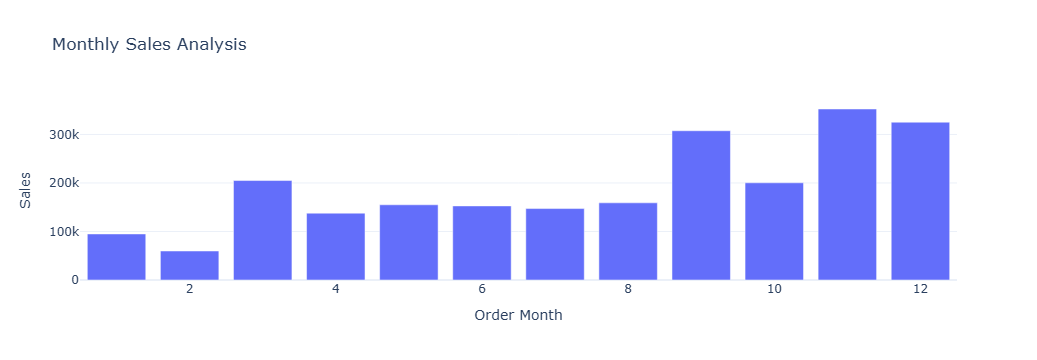

In [6]:
# Date visualisation (Sales by Month)
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()

fig = px.bar(sales_by_month, x='Order Month', y='Sales', title="Monthly Sales Analysis")
fig.show()

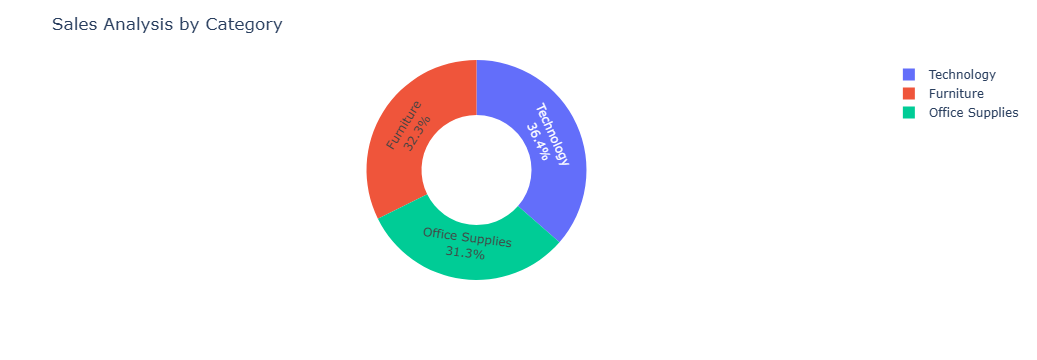

In [7]:
# Date visualisation (Sales by Category)
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

fig = px.pie(sales_by_category, 
                 values='Sales', 
                 names='Category', 
                 hole=0.5)

fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category')

fig.show()

In [8]:
# Date visualisation (Sales by Sub-Category)
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()

fig = px.bar(sales_by_subcategory, 
                 x='Sub-Category',
                 y='Sales',
                 title='Sales Analysis by Sub-Category')
fig.show()

In [ ]:
# Date visualisation (Profit by Month)
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()

fig = px.bar(profit_by_month,
            x='Order Month',
            y='Profit',
            title='Monthly Profit Analysis')
fig.show()

In [10]:
# Date visualisation (Profit by Category)
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(profit_by_category, 
                 values='Profit', 
                 names='Category', 
                 hole=0.5)

fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category')

fig.show()

In [11]:
# Date visualisation (Profit by Sub-Category)
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()

fig = px.bar(profit_by_subcategory, 
                 x='Sub-Category',
                 y='Profit',
                 title='Profit Analysis by Sub-Category')
fig.show()

In [12]:
# Date visualisation (Sales profit by segment)
sales_profit_by_segment = data.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()


fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales'))

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit'))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()

In [13]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

sales_profit_by_segment['Sales_to_profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']

print(sales_profit_by_segment[['Segment','Sales_to_profit_Ratio']])

       Segment  Sales_to_profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
